# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from pprint import pprint
from citipy import citipy
from config import api_key

## Generate Cities List

In [3]:
# Set Variable and lists
counter = 0
rndlat=[]
rndlon=[]

#Finds Latitude and Longitude for 600 randomly generated coordinates to allow for missing cities in API
while len(rndlat) < 600:
    lat = np.random.uniform(-90, 90)
    lon = np.random.uniform(-180,180)
    rndlat.append(lat)
    rndlon.append(lon)
    counter += 1 

#Create DataFrame of random coordinates
geo_df = pd.DataFrame ({"lat": rndlat, "lon":rndlon})
geo_df.head()

#Create Empty lists for city
cities = []
country = []

#Loop through coordinates and find the nearest city's weather data
for index, row in geo_df.iterrows():
    city_lat=(row["lat"])
    city_lon=(row["lon"])
    city_name = citipy.nearest_city(city_lat, city_lon).city_name
    country_code = citipy.nearest_city(city_lat, city_lon).country_code
    cities.append(str(city_name))
    country.append(country_code)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


query_url = f"{url}appid={api_key}&units={units}&q="
print(query_url + cities[0])

http://api.openweathermap.org/data/2.5/weather?appid=a6ec59617cbd1356d63a167852913fae&units=imperial&q=grand river south east


In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
hum = []
temp = []
cloud = []
windy = []
geo = []
country = []
lat = []
nan = []

# Loop through the list of cities and perform a request for data on each
for city in cities:     
    try:
        response = requests.get(query_url + city).json()
        geo.append(response["name"])
        country.append(response["sys"]["country"])
        hum.append(response["main"]["humidity"])
        temp.append(response["main"]["temp"])   
        cloud.append(response["clouds"]["all"]) 
        windy.append(response["wind"]["speed"])
        lat.append(response["coord"]["lat"])
    #Allows for cities missing from OpenWeather
    except KeyError:
        nan.append(city)

#Verify that of 600 cities not more than 100 are missing
print(len(nan))
    
    
#wind_speed.append(response['wind']['speed'])"""
#print(f"The humidity information received is: {hum}")
#print(f"The temperature information received is: {temp}")
#print(f"The cloudines % is: {cloud}")
#print(f"The wind speed is: {windy}")


63


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
weather_dict = {
    "city": geo,
    "country": country,
    "humidity": hum,
    "temp": temp,
    "cloud":cloud,
    "windy":windy,
    "lat":lat}
city_data = pd.DataFrame(weather_dict)
city_data.head()

print(len(city_data))

537


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#  Get the indices of cities that have humidity over 100%.
indices = city_data.index[city_data["humidity"] >= 100]
print(len(indices))
print(indices)

16
Int64Index([18, 42, 95, 102, 121, 151, 186, 189, 198, 244, 328, 339, 343, 472,
            481, 524],
           dtype='int64')


In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#Drop data by index (matching list indices) then input to new df 
clean_city_data = city_data.drop(index=indices)

#Verify data was dropped
print(len(city_data)),print(len(clean_city_data))

clean_city_data.head()

537
521


,city,country,humidity,temp,cloud,windy,lat
0,Byron Bay,AU,93,56.16,4,3.36,-28.65
1,Port Elizabeth,ZA,82,57.20,0,3.36,-33.92
2,Baykit,RU,76,52.74,100,6.26,61.67
3,Bluff,NZ,82,41.00,60,10.00,-46.60
4,Tashtagol,RU,90,52.43,95,6.11,52.77


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

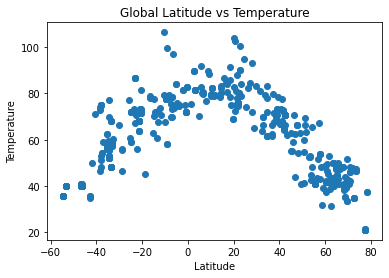

In [15]:
#Data into axis
x_axis = clean_city_data["lat"]
y_axis = clean_city_data["temp"]

#Labels
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Global Latitude vs Temperature")

#Put into scatter plot
plt.scatter(x_axis,y_axis)

## Latitude vs. Humidity Plot

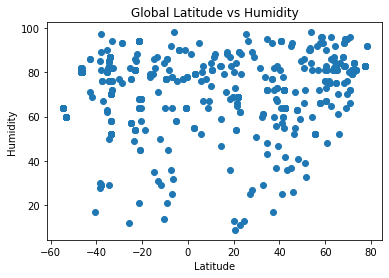

In [16]:
#Data into axis
x_axis = clean_city_data["lat"]
y_axis = clean_city_data["humidity"]

#Labels
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Global Latitude vs Humidity")

#Put into scatter plot
plt.scatter(x_axis,y_axis)

## Latitude vs. Cloudiness Plot

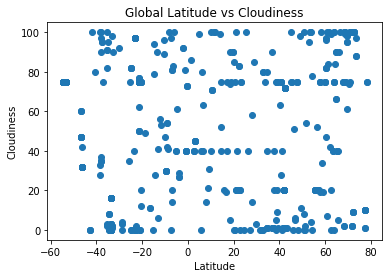

In [17]:
#Data into axis
x_axis = clean_city_data["lat"]
y_axis = clean_city_data["cloud"]

#Labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Global Latitude vs Cloudiness")

#Put into scatter plot
plt.scatter(x_axis,y_axis)

## Latitude vs. Wind Speed Plot

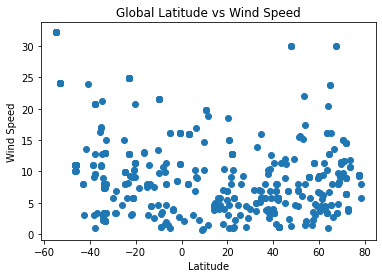

In [18]:
#Data into axis
x_axis = clean_city_data["lat"]
y_axis = clean_city_data["windy"]

#Labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Global Latitude vs Wind Speed")

#Put into scatter plot
plt.scatter(x_axis,y_axis)

## Linear Regression

In [ ]:
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression